In [10]:
# Imports
from lr_utils import qr_householder, linear_regression

import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Read the CSV file
housing_data = pd.read_csv('data/real_estate.csv')

# Rename the columns to a simpler format
housing_data.columns = ['No', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']

# Round X1 (transaction date) to int
housing_data['X1'] = housing_data['X1'].round().astype(int)

# Check the updated dataset
print(housing_data.head())

   No    X1    X2         X3  X4        X5         X6     Y
0   1  2013  32.0   84.87882  10  24.98298  121.54024  37.9
1   2  2013  19.5  306.59470   9  24.98034  121.53951  42.2
2   3  2014  13.3  561.98450   5  24.98746  121.54391  47.3
3   4  2014  13.3  561.98450   5  24.98746  121.54391  54.8
4   5  2013   5.0  390.56840   5  24.97937  121.54245  43.1


In [11]:
# Subset the first 80 data points for training
training_data = housing_data.iloc[:350].copy()

X_train = training_data[['X2', 'X3', 'X4', 'X5', 'X6']].values
y_train = training_data['Y'].values

test_data = housing_data.iloc[350:].copy()

X_test = test_data[['X2', 'X3', 'X4', 'X5', 'X6']].values
y_test = test_data['Y'].values

R-squared: 0.586035599457275
MSE 66.06479597349755
MAE: 6.125477980423988


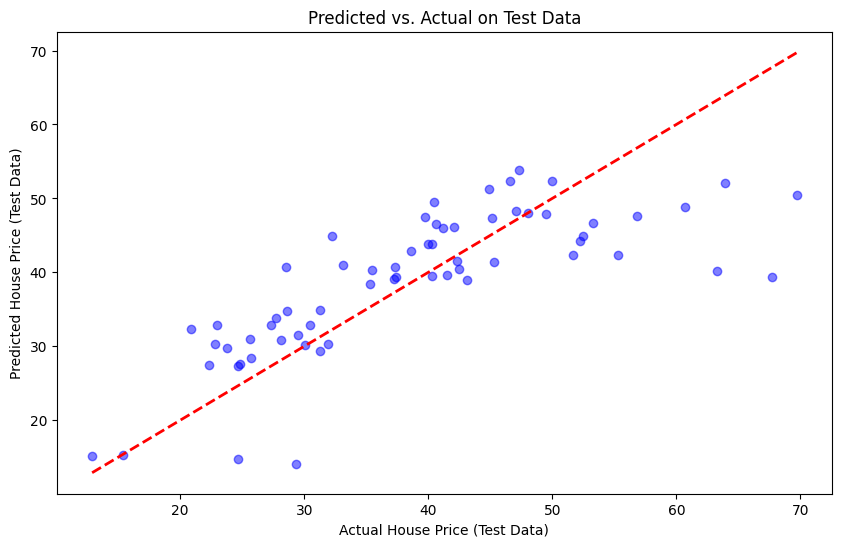

In [12]:
# Method 1: QR decomposition

# Train the model using QR decomposition
w = linear_regression(X_train, y_train)

# Predict on the test set
X_test_bars = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)  # Add bias term
y_pred = np.dot(X_test_bars, w)

# Evaluate the model on the test set
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mse = mean_squared_error(y_test, y_pred)
print("MSE", mse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Plot the test results (Predicted vs. Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual House Price (Test Data)')
plt.ylabel('Predicted House Price (Test Data)')
plt.title('Predicted vs. Actual on Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Reference line
plt.show()

R-squared: 0.5860355994573472
MSE 66.06479597348604
MAE: 6.1254779804221835


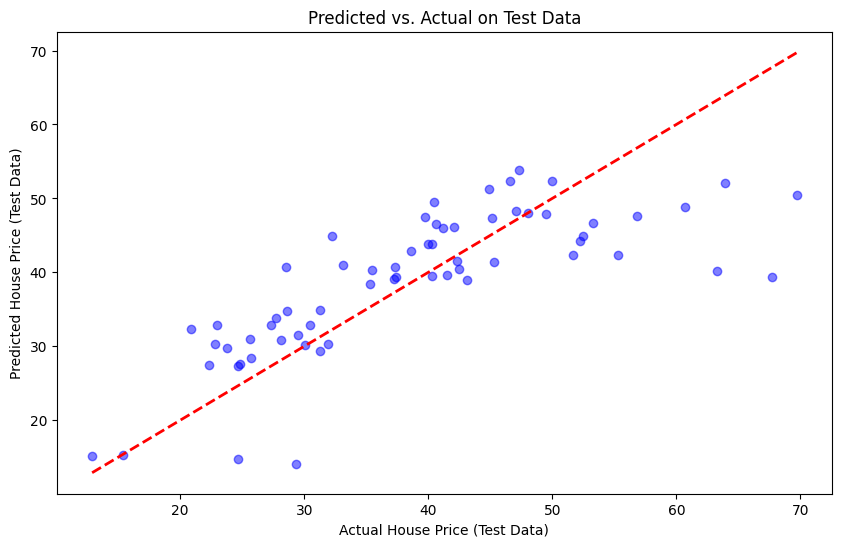

In [13]:
# Method 2: sklearn linear regression

# Train the model
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)

# Predict on the test set
y_pred = regr.predict(X_test)

# Evaluate the model on the test set
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mse = mean_squared_error(y_test, y_pred)
print("MSE", mse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Plot the test results (Predicted vs. Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual House Price (Test Data)')
plt.ylabel('Predicted House Price (Test Data)')
plt.title('Predicted vs. Actual on Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Reference line
plt.show()